In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnistt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


Based on mnist docs data is already been split, not need for splitting

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image.shape

(28, 28)

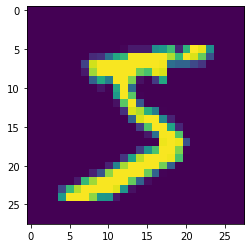

In [7]:
plt.imshow(single_image)

visiualizing data in the mnist dataset

note: values from 0 - 255

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(60000,)

In [12]:
y_example = to_categorical(y_train)

In [13]:
y_example.shape

(60000, 10)

one hot encoded the array

In [14]:
y_cat_test = to_categorical(y_test)

In [15]:
y_cat_train = to_categorical(y_train)

categorized data ^^

In [16]:
x_train = x_train / 255

In [17]:
x_test = x_test / 255

future images have to have values between 0 - 255 so there is no data leakage and no need for minmaxscaler to be used

In [18]:
scaled_image = x_train[0]

In [19]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

checking to see everything worked

In [20]:
x_train.shape

(60000, 28, 28)

need to add one more 1 more dimension so network knows there is only one colour channel

In [21]:
x_train = x_train.reshape(60000,28,28,1)
#batch_size, eidth, height,colour_channels

In [22]:
x_test = x_test.reshape(10000,28,28,1)

#test set has 10,000 images so batch size is 10,000

In [23]:
x_test.shape

(10000, 28, 28, 1)

In [24]:
x_train.shape

(60000, 28, 28, 1)

everything looking good so far

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten

In [28]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dense(10, activation='softmax')) #softmax since multiclass problem

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Hyper pram input_shape are determined based on the data set

last dense layer is based on the number of classes

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_losses', patience = 1) # could add accuraty as the monitor since I defined it up there but still want to see loss

In [31]:
model.fit(x_train, y_cat_train, epochs=10, 
         validation_data = (x_test, y_cat_test), callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 420us/sample - loss: 0.1340 - accuracy: 0.9603 - val_loss: 0.0570 - val_accuracy: 0.9816
Epoch 2/10
60000/60000 [==============================] - 22s 365us/sample - loss: 0.0449 - accuracy: 0.9858 - val_loss: 0.0482 - val_accuracy: 0.9831
Epoch 3/10
60000/60000 [==============================] - 21s 349us/sample - loss: 0.0306 - accuracy: 0.9905 - val_loss: 0.0424 - val_accuracy: 0.9867
Epoch 4/10
60000/60000 [==============================] - 21s 358us/sample - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0514 - val_accuracy: 0.9829
Epoch 5/10
60000/60000 [==============================] - 22s 367us/sample - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.0459 - val_accuracy: 0.9870
Epoch 6/10
60000/60000 [==============================] - 22s 372us/sample - loss: 0.0107 - accuracy: 0.9964 - val_loss: 0.0442 - val_accuracy: 0.9876
Epoch 7/10
60000/60000 [====================

In [32]:
metrics = pd.DataFrame(model.history.history) # since i gave it accuracy i want those too

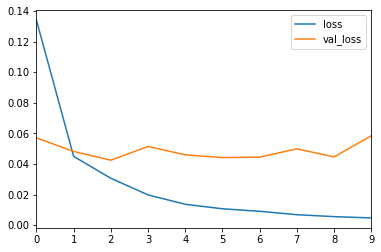

In [33]:
metrics[['loss', 'val_loss']].plot()

eh

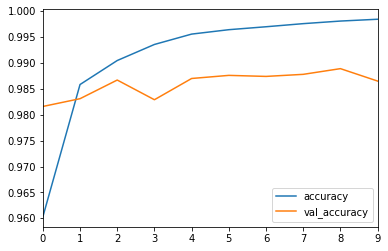

In [35]:
metrics[['accuracy', 'val_accuracy']].plot()

eh accuracy on validation

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
predictions = model.predict_classes(x_test)

In [38]:
y_test.shape

(10000,)

In [42]:
print(classification_report(y_test, predictions)) #using y_test cause its in the format that i want

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [43]:
number = x_test[0]

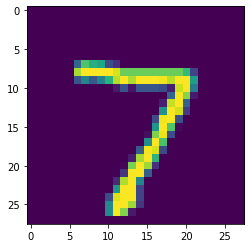

In [45]:
plt.imshow(number.reshape(28,28))

checking to see what my number is before i test the model with test data

In [49]:
model.predict_classes(number.reshape(1,28,28,1))

array([7])

everything worked, good stuff

In [51]:
from tensorflow.keras.models import load_model

In [52]:
model.save('greyscalenumberpredictor.h5')